In [9]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('CarPrice_Assignment.csv')
print(df.shape)
df.head(10)

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data preprocessing

In [12]:
df["brand"] = df["CarName"].str.split().str[0].str.lower()
df.drop(['CarName'],axis=1,inplace=True)
print(df['brand'].unique())
df.head(10)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,gas,std,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


In [13]:
df["brand"] = df["brand"].replace(to_replace={"maxda": "mazda", "porcshce": "porsche", "toyouta": "toyota", "vw": "volkswagen"})
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vokswagen', 'volkswagen', 'volvo'],
      dtype=object)

### Visualize data

Text(0.5, 1.0, 'Car Price Distribution')

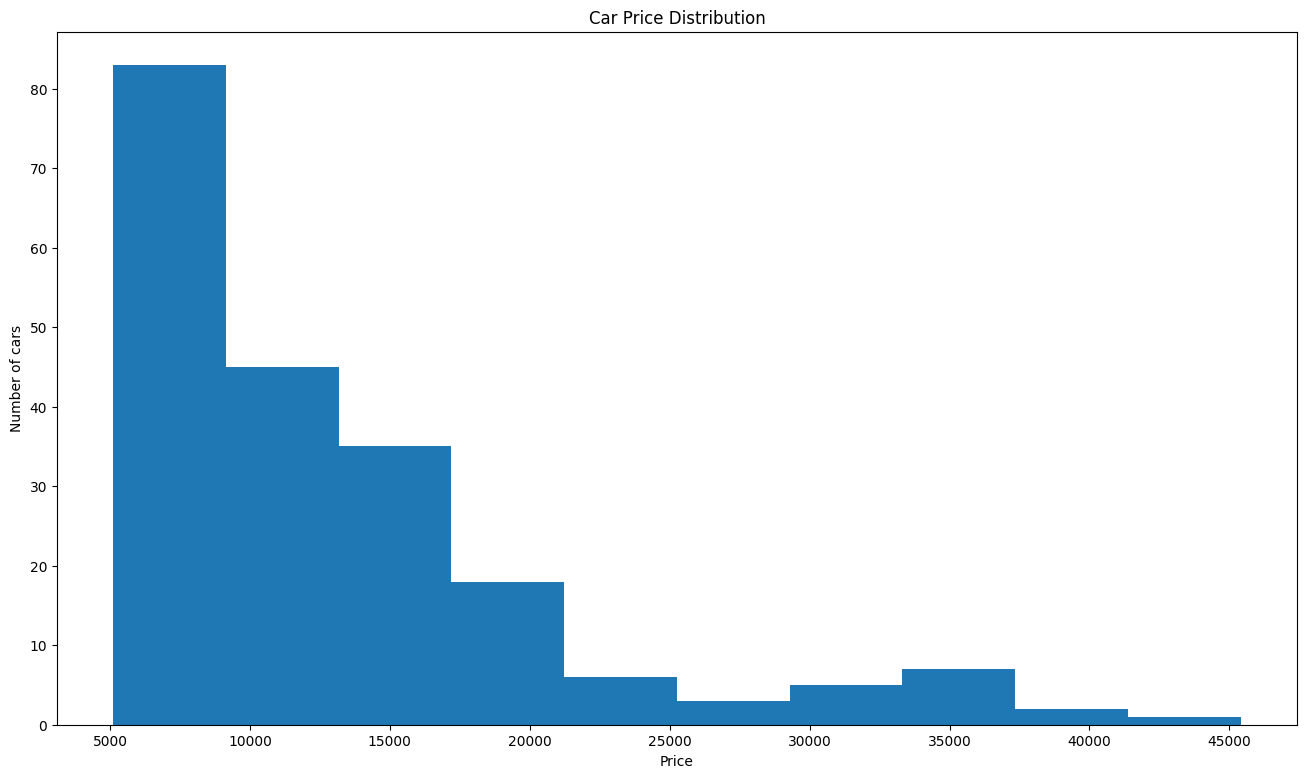

In [14]:
plt.figure(figsize=(16, 9))
plt.hist(df.price)
plt.xlabel('Price')
plt.ylabel('Number of cars')
plt.title('Car Price Distribution')

####Visualize categorical data

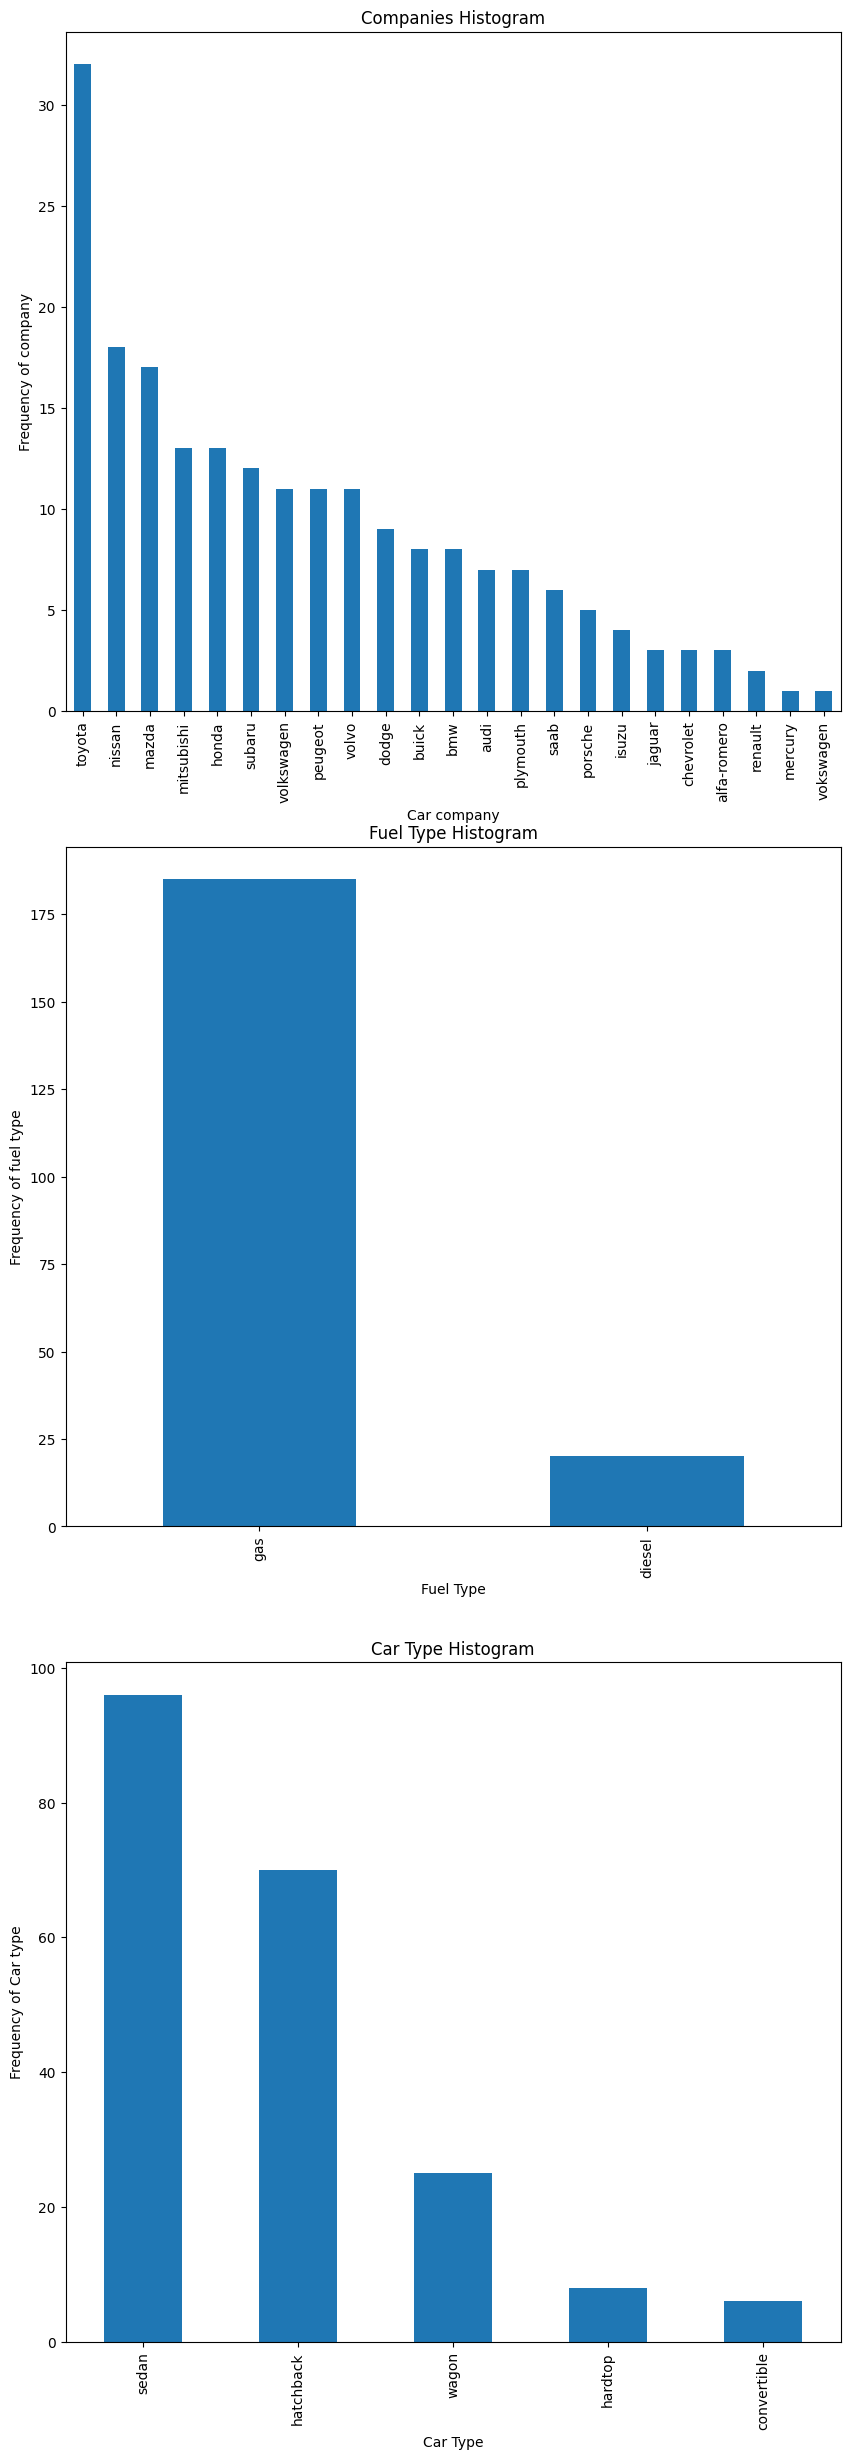

In [15]:
plt.figure(figsize=(10, 30))

plt.subplot(3,1,1)
plt1 = df.brand.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(3,1,2)
plt1 = df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(3,1,3)
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

<Figure size 1000x600 with 0 Axes>

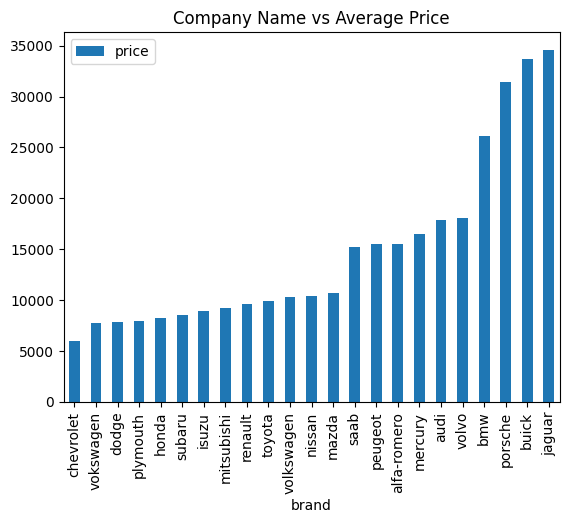

In [16]:
plt.figure(figsize=(10, 6))
df_to_plot = pd.DataFrame(df.groupby(['brand'])['price'].mean().sort_values())
df_to_plot.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

#### Visualise numerical data

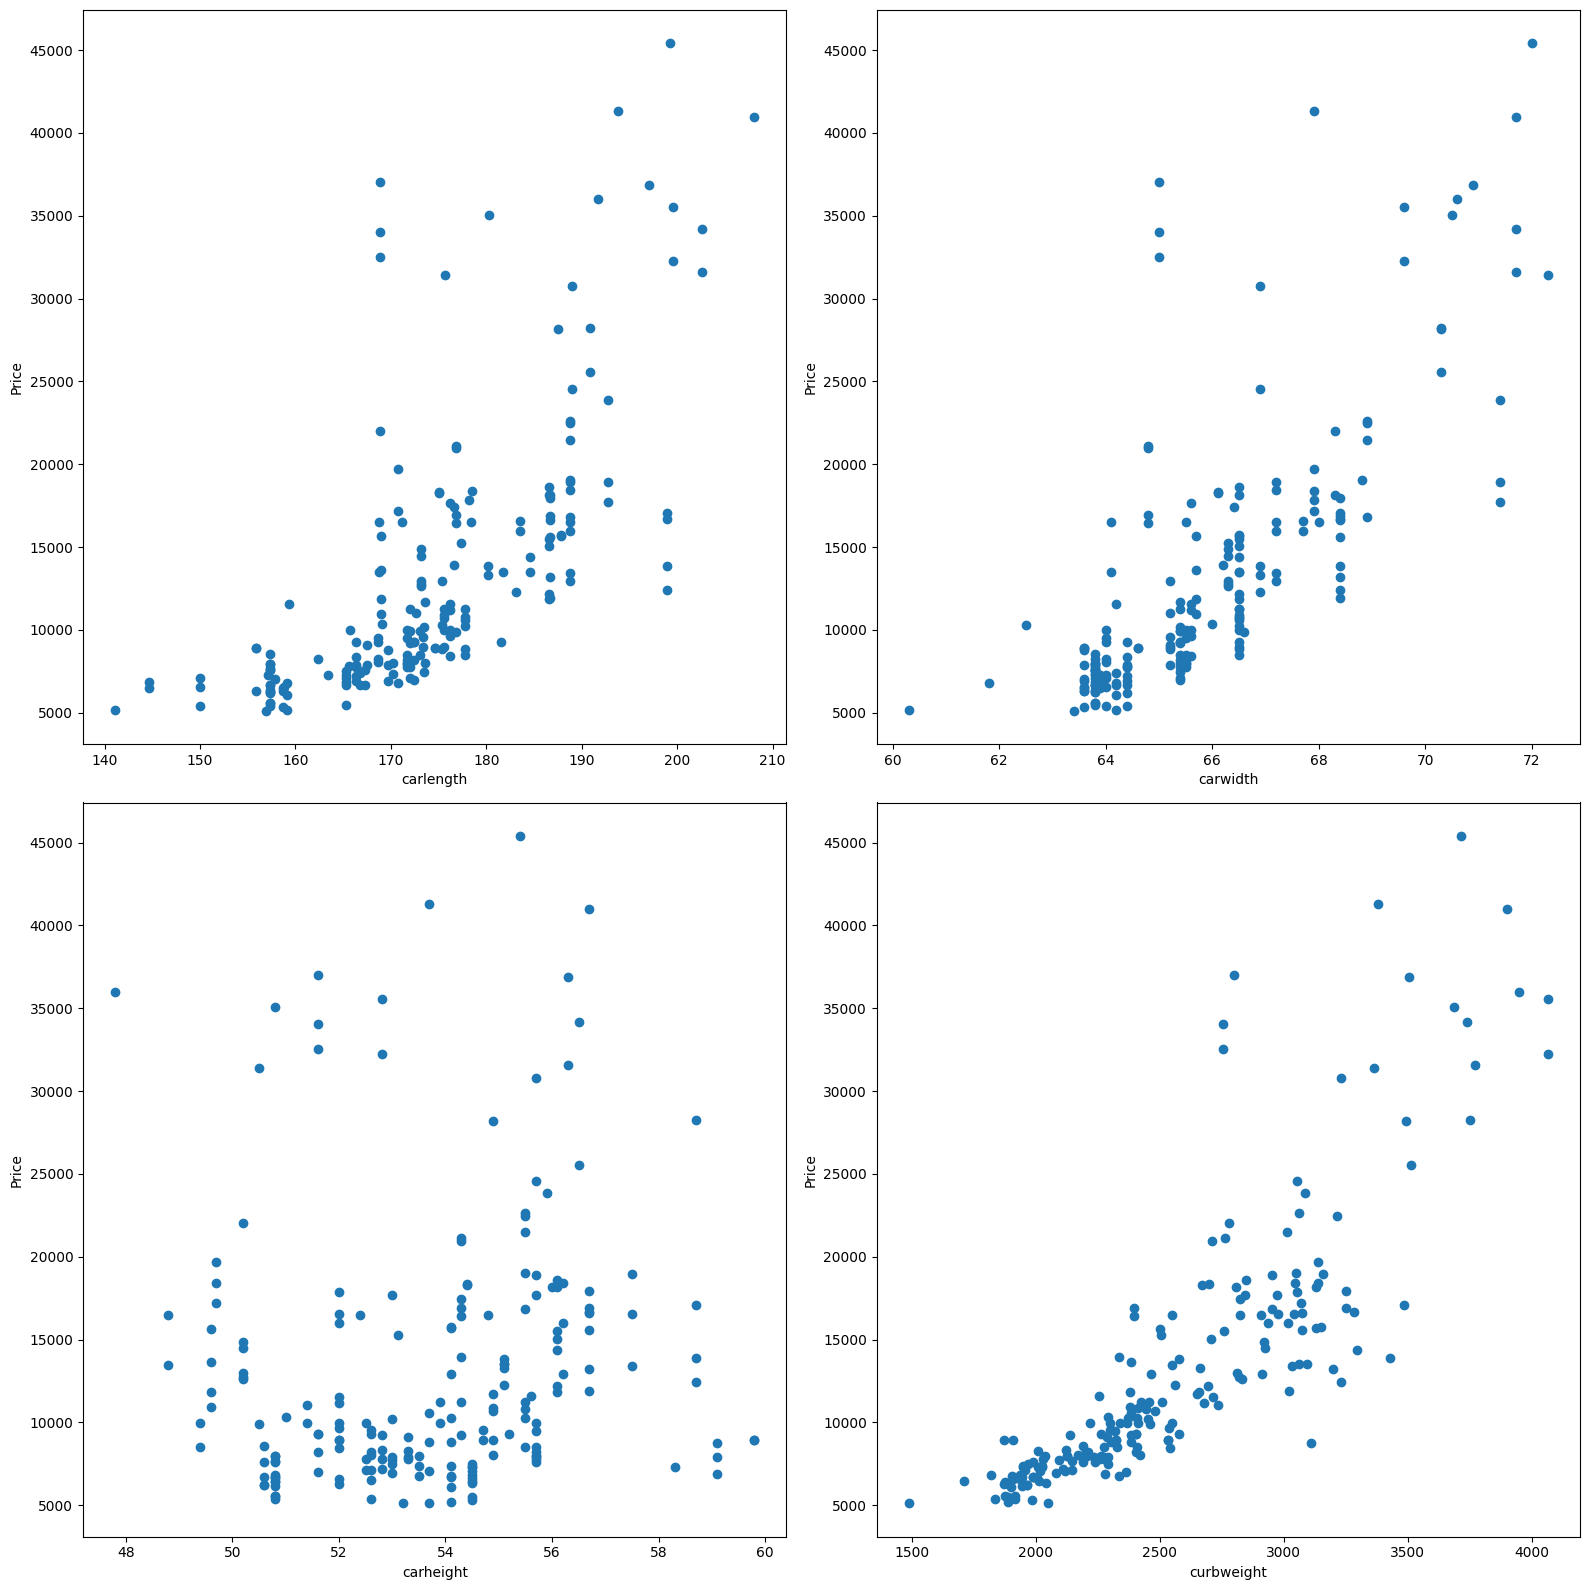

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()
features = ['carlength', 'carwidth', 'carheight', 'curbweight']

for ax, feature in zip(axes, features):
    ax.scatter(df[feature], df['price'])
    ax.set_ylabel('Price')
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

In [18]:
df_lr = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower',
                     'carlength','carwidth']]
df_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [19]:
def create_dummies(df, columns):
    return pd.concat([df, pd.get_dummies(df[columns], drop_first=True)], axis=1).drop(columns, axis=1)

df_lr = create_dummies(df_lr, ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'])

### Train test split

In [20]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
temp=df_lr
df_train, df_test = train_test_split(df_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df['price'] = df['price'].astype('int')
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [22]:
y_train = df_train.pop('price')
X_train = df_train

### Model Building

In [23]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", scores)
print("Average R-squared score:", scores.mean())

Cross-validation R-squared scores: [0.74028327 0.80767203 0.90584433 0.70330427 0.73216045]
Average R-squared score: 0.7778528694898519


In [24]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", scores)
print("Average R-squared score:", scores.mean())

Cross-validation R-squared scores: [0.62840057 0.93193107 0.86573446 0.95202191 0.62533503]
Average R-squared score: 0.8006846074559698


In [25]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
mlp.fit(X_train, y_train)
mlp_scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", mlp_scores)
print("Average R-squared score:", mlp_scores.mean())

Cross-validation R-squared scores: [0.57735143 0.84752355 0.83928928 0.81613329 0.70528024]
Average R-squared score: 0.757115557749233


In [26]:
X_train_array = X_train.values
X_train_array_reshape  =X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn):
        self.build_fn = build_fn
        self.model = None

    def fit(self, X, y, **kwargs):
        self.model = self.build_fn()
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X, **kwargs):
        return self.model.predict(X, **kwargs)

# Define the model building function:
def build_lstm():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_regressor = KerasRegressor(build_fn=build_lstm)
lstm_regressor.fit( X_train, y_train, epochs=10, batch_size=200, verbose=2)
lstm_scores = cross_val_score(lstm_regressor, X_train_array_reshape, y_train, cv=5, scoring='r2')

print("Cross-validation R-squared scores:", lstm_scores)
print("Average R-squared score:", lstm_scores.mean())

Epoch 1/10
1/1 - 2s - loss: 0.0902 - 2s/epoch - 2s/step
Epoch 2/10
1/1 - 0s - loss: 0.0805 - 21ms/epoch - 21ms/step
Epoch 3/10
1/1 - 0s - loss: 0.0719 - 21ms/epoch - 21ms/step
Epoch 4/10
1/1 - 0s - loss: 0.0644 - 19ms/epoch - 19ms/step
Epoch 5/10
1/1 - 0s - loss: 0.0578 - 19ms/epoch - 19ms/step
Epoch 6/10
1/1 - 0s - loss: 0.0524 - 19ms/epoch - 19ms/step
Epoch 7/10
1/1 - 0s - loss: 0.0482 - 18ms/epoch - 18ms/step
Epoch 8/10
1/1 - 0s - loss: 0.0455 - 20ms/epoch - 20ms/step
Epoch 9/10
1/1 - 0s - loss: 0.0446 - 20ms/epoch - 20ms/step
Epoch 10/10
1/1 - 0s - loss: 0.0457 - 18ms/epoch - 18ms/step
4/4 [==============================] - 2s 13ms/step - loss: 0.0892


### Avoid overfitting and apply feature selection



In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

linear_model = Lasso()

param_grid = {'alpha': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(linear_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", scores)
print("Average R-squared score:", scores.mean())

In [ ]:
df_train.pop('carlength')
df_train.pop('curbweight')
X_train = df_train

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

linear_model = Lasso()

param_grid = {'alpha': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(linear_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", scores)
print("Average R-squared score:", scores.mean())